<a href="https://colab.research.google.com/github/Harsaroop/COMP-3710-Project-2/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
#Reading data
df = pd.read_csv('/content/Bias_correction_ucl - Copy.csv', nrows=5000)
data = df.round(decimals=3)

In [59]:
data.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4995,21,2016-07-13,29.4,23.8,41.974,87.208,31.688,23.559,8.729,30.103,...,0.0,0.0,0.0,37.551,127.040,26.298,0.572,5731.151,31.4,23.7
4996,22,2016-07-13,30.5,23.9,47.099,85.528,30.620,23.963,7.511,89.966,...,0.0,0.0,0.0,37.510,127.086,21.967,0.133,5723.706,32.3,24.5
4997,23,2016-07-13,29.9,24.2,44.952,88.356,30.959,23.534,7.854,90.602,...,0.0,0.0,0.0,37.537,126.891,15.588,0.155,5722.568,33.6,24.6
4998,24,2016-07-13,29.8,23.9,42.318,86.102,31.491,23.701,8.079,47.957,...,0.0,0.0,0.0,37.524,126.909,17.296,0.222,5721.034,32.6,24.4
4999,25,2016-07-13,29.7,24.1,40.501,84.009,31.824,23.801,8.247,23.038,...,0.0,0.0,0.0,37.524,126.970,19.584,0.271,5726.839,32.5,23.8


In [61]:
df1 = pd.DataFrame()
df1['Present_Tmax'], df1['Next_Tmax'] = data['Present_Tmax'], data['Next_Tmax']
df1.tail()

,Present_Tmax,Next_Tmax
4995,29.4,31.4
4996,30.5,32.3
4997,29.9,33.6
4998,29.8,32.6
4999,29.7,32.5


In [ ]:
X = data[['station',  'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']].values
y = data['Present_Tmax'].values

In [63]:
#Slipting train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(df1['Present_Tmax'], df1['Next_Tmax'])
X_train_df , X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

In [64]:
X_train

4427    29.2
2200    24.1
2061    31.7
940     26.5
2223    27.4
        ... 
3200    26.1
2582    26.8
1569    29.3
1954    30.1
2196    34.3
Name: Present_Tmax, Length: 3750, dtype: float64

In [65]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_


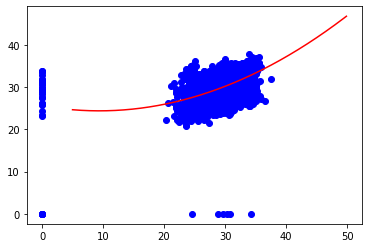

In [66]:
#Plotting graph

x_axis = np.arange(5,50,0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis**2 
plt.scatter(df1['Present_Tmax'], df1['Next_Tmax'], color='b')
plt.plot(x_axis, response, color = 'r')
plt.show()

In [67]:
from sklearn.metrics import r2_score

prediction = model.predict(X_test_poly)
r2_score(prediction, y_test)

-2.55822089453821